In [1]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot
from astropy.io import fits
%matplotlib inline

# Problem 2

## Part a

Create data array

In [2]:
data = np.zeros((1024, 1024))
#Assuming you're giving us [X, Y] coordinates
data[501, 511] = 1.
data[521, 511] = 1.

Take the 2D Fourier Transform

In [3]:
ft_data = fftpack.fft2(data)
ft_data_power_spec = ft_data*ft_data.conjugate()
#Make sure ft_data_mag is all real, if it is, convert to real array for plotting
if np.isreal(ft_data_power_spec).all():
    ft_data_power_spec = ft_data_power_spec.real


Display the data

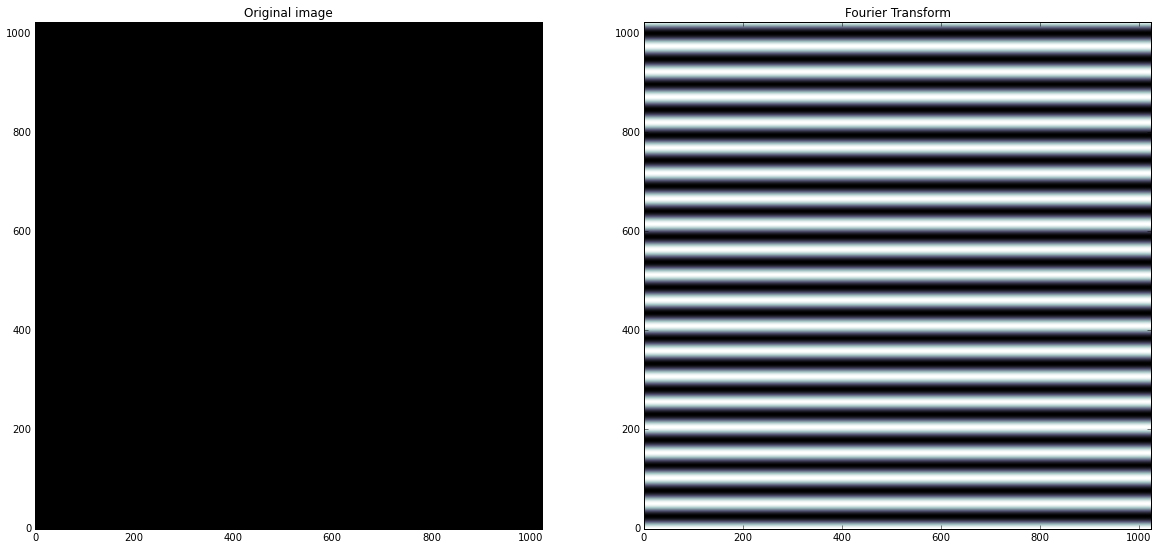

In [4]:
fig = pyplot.figure(figsize = [20, 10])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title('Original image')
ax2.set_title('Fourier Transform')

im1 = ax1.imshow(data, cmap = 'bone', interpolation = 'nearest')
im2 = ax2.imshow(ft_data_power_spec, cmap = 'bone', interpolation = 'nearest')

## Part B

Read in the data

In [20]:
tbdata = fits.getdata('../data/visibilities_snapshot.fits', 0)

Create a 2D histogram with 2048x2048 bins

In [21]:
n, x_edges, y_edges = np.histogram2d(tbdata['u'], tbdata['v'], bins = [2048,2048])

Set all bins with values larger than one to be 1

In [22]:
n[n>1.] = 1.

Fourier tranform

In [23]:
ft_n = fftpack.fft2(n)

Multiply the FT by it complex conjugate

In [24]:
ft_n_power_spec = ft_n*ft_n.conjugate()
if np.isreal(ft_n_power_spec).all():
    ft_n_power_spec = ft_n_power_spec.real

Use fftshift to center

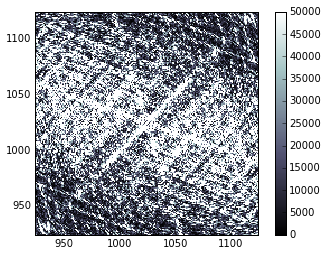

In [26]:
ft_n_power_spec_shift = fftpack.fftshift(ft_n_power_spec, (0, 1))
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
im = ax.imshow(ft_n_power_spec_shift, vmax = 50000, cmap = 'bone', interpolation = 'nearest')
ax.set_xlim(924, 1124)
ax.set_ylim(924, 1124)
fig.colorbar(mappable = im)
pyplot.savefig('vla_snapshot.png')

Repeat

In [11]:
tbdata = fits.getdata('../data/visibilities_longtrack.fits', 0)
n, x_edges, y_edges = np.histogram2d(tbdata['u'], tbdata['v'], bins = [2048,2048])
n[n>1.] = 1.
ft_n = fftpack.fft2(n)
ft_n_power_spec = ft_n*ft_n.conjugate()
if np.isreal(ft_n_power_spec).all():
    ft_n_power_spec = ft_n_power_spec.real
ft_n_power_spec_shift = fftpack.fftshift(ft_n_power_spec)

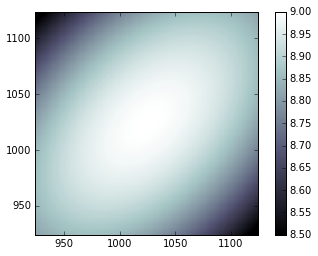

In [18]:
ft_n_power_spec_shift = fftpack.fftshift(ft_n_power_spec, (0, 1))
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
im = ax.imshow(ft_n_power_spec_shift, vmin =8.5, vmax = 9,  cmap = 'bone', interpolation = 'nearest')
ax.set_xlim(924, 1124)
ax.set_ylim(924, 1124)
fig.colorbar(mappable = im)
pyplot.savefig('vla_longtrack.png')